## Klasifikacija malignog i benignog raka dojke koristeći algoritme strojnog učenja $\newline$- replikacija rezultata

Rad je preuzet s poveznice: https://ieeexplore.ieee.org/document/9445249

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Radi replikacije rezultata, podatci su pripremljeni na isti način kao što je opisano u radu. Nisu izbacivane stršeće vrijednosti, već su korišteni svi primjerci.
Vidimo da distribucija po klasama točno odgovara onoj dobivenoj u radu na slici 1:

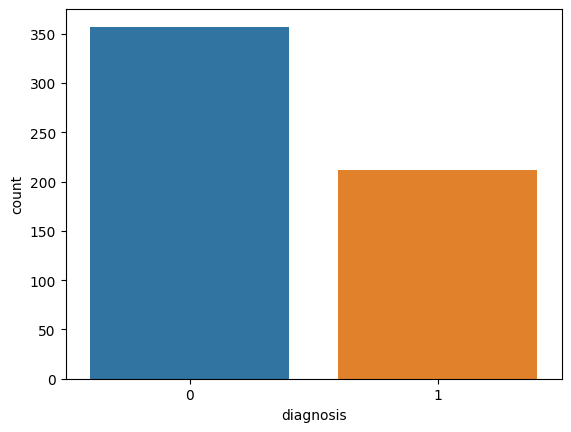

0    357
1    212
Name: diagnosis, dtype: int64


In [2]:
df = pd.read_csv('data_sanitized.csv')
sns.countplot(df, x='diagnosis')
plt.show()
print(df['diagnosis'].value_counts())

Kao što je navedeno u odlomku III.B, izbačeni su atributi _fractal\_dimension\_mean_, _texture\_se_ i _symmetry\_se_ zbog vrlo niske korelacije s ciljnim razredom.

In [3]:
print("# of columns before:", len(df.columns.values))
df.drop(['fractal_dimension_mean', 'texture_se', 'symmetry_se'], axis=1, inplace=True)
print(df.columns.values)
print("# of columns after:", len(df.columns.values))


# of columns before: 31
['diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave_points_mean' 'symmetry_mean' 'radius_se' 'perimeter_se'
 'area_se' 'smoothness_se' 'compactness_se' 'concavity_se'
 'concave_points_se' 'fractal_dimension_se' 'radius_worst' 'texture_worst'
 'perimeter_worst' 'area_worst' 'smoothness_worst' 'compactness_worst'
 'concavity_worst' 'concave_points_worst' 'symmetry_worst'
 'fractal_dimension_worst']
# of columns after: 28


Potom, skup podataka nasumično je podijeljen u skup za treniranje i skup za testiranje u omjeru 3:1

In [4]:
#split df into train and test
from sklearn.model_selection import train_test_split
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


Sada ćemo redom isprobati navedene algoritme strojnog učenja, zabilježiti njihove preciznosti i naposljetku ih skupno prikazati.

### Logistička regresija

In [5]:
# logistic regression
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=100000)
logisticRegr.fit(X_train, y_train)
LRaccTrain = logisticRegr.score(X_train, y_train)
print("Accuracy on training set:", LRaccTrain)
LRaccTest = logisticRegr.score(X_test, y_test)
print("Accuracy on test set:", LRaccTest)


Accuracy on training set: 0.9577464788732394
Accuracy on test set: 0.965034965034965


### K-Najbližih susjeda (KNN)

In [6]:
# KNN classifier
from sklearn.neighbors import KNeighborsClassifier
maxAccTrain = 0
maxAccTest = 0
maxi = 0
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    KNNaccTrain = knn.score(X_train, y_train)
    KNNaccTest = knn.score(X_test, y_test)
    if(KNNaccTest > maxAccTest):
        maxAccTest = KNNaccTest
        maxAccTrain = KNNaccTrain
        maxi = i

print(f"Accuracy on training set ({maxi}):", maxAccTrain)
print(f"Accuracy on test set ({maxi}):", maxAccTest)

Accuracy on training set (2): 0.9483568075117371
Accuracy on test set (2): 0.951048951048951


### Stablo odluke

In [7]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
treeAccTrain = tree.score(X_train, y_train)
print("Accuracy on training set:", treeAccTrain)
treeAccTest = tree.score(X_test, y_test)
print("Accuracy on test set:", treeAccTest)


Accuracy on training set: 1.0
Accuracy on test set: 0.9230769230769231


### Naivni Bayesov klasifikator

In [8]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nbAccTrain = nb.score(X_train, y_train)
print("Accuracy on training set:", nbAccTrain)
nbAccTest = nb.score(X_test, y_test)
print("Accuracy on test set:", nbAccTest)

Accuracy on training set: 0.9413145539906104
Accuracy on test set: 0.9440559440559441


### Slučajna šuma

In [9]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rfAccTrain = rf.score(X_train, y_train)
print("Accuracy on training set:", rfAccTrain)
rfAccTest = rf.score(X_test, y_test)
print("Accuracy on test set:", rfAccTest)


Accuracy on training set: 1.0
Accuracy on test set: 0.965034965034965


### Stroj potpornih vektora

In [10]:
# SVM
from sklearn.svm import SVC
methodsAcc = {'linear': (0, 0, 0), 'poly': (
    0, 0, 0), 'rbf': (0, 0, 0), 'sigmoid': (0, 0, 0)}
for method in methodsAcc.keys():
    i = -10
    improving = 2
    while(i < 6 or improving > 0):
        # print(i)
        improving -= 1
        svm = SVC(kernel=method, C=10**i)
        svm.fit(X_train, y_train)
        SVMaccTrain = svm.score(X_train, y_train)
        SVMaccTest = svm.score(X_test, y_test)
        if (SVMaccTest > methodsAcc[method][2]+0.0001):
            # print(methodsAcc[method][2], SVMaccTest, i)
            methodsAcc[method] = (i, SVMaccTrain, SVMaccTest)
            improving = 2
        i += 1
    print(
        f"Best accuracy on training set (C={10**methodsAcc[method][0]}, method={method}):", methodsAcc[method][1])
    print(
        f"Best accuracy on test set (C={10**methodsAcc[method][0]}, method={method}):", methodsAcc[method][2])


Best accuracy on training set (C=0.0001, method=linear): 0.9225352112676056
Best accuracy on test set (C=0.0001, method=linear): 0.9790209790209791
Best accuracy on training set (C=100, method=poly): 0.9178403755868545
Best accuracy on test set (C=100, method=poly): 0.965034965034965
Best accuracy on training set (C=100, method=rbf): 0.9225352112676056
Best accuracy on test set (C=100, method=rbf): 0.972027972027972
Best accuracy on training set (C=1e-10, method=sigmoid): 0.607981220657277
Best accuracy on test set (C=1e-10, method=sigmoid): 0.6853146853146853


### Usporedba rezultata
Nakon treniranja algoritama, dobiveni su sljedeći rezultati:

In [11]:
# make an aligned markdown table with all the accuracies
from tabulate import tabulate
table = [['Logistic Regression', LRaccTrain, LRaccTest]
, ['KNN', maxAccTrain, maxAccTest]
, ['Decision Tree', treeAccTrain, treeAccTest]
, ['Naive Bayes', nbAccTrain, nbAccTest]
, ['Random Forest', rfAccTrain, rfAccTest]
, ['SVM (linear)', methodsAcc['linear'][1], methodsAcc['linear'][2]]
, ['SVM (poly)', methodsAcc['poly'][1], methodsAcc['poly'][2]]
, ['SVM (rbf)', methodsAcc['rbf'][1], methodsAcc['rbf'][2]]
, ['SVM (sigmoid)', methodsAcc['sigmoid'][1], methodsAcc['sigmoid'][2]]]
print(tabulate(table, headers=['Classifier',
      'Training Accuracy', 'Test Accuracy']))


Classifier             Training Accuracy    Test Accuracy
-------------------  -------------------  ---------------
Logistic Regression             0.957746         0.965035
KNN                             0.948357         0.951049
Decision Tree                   1                0.923077
Naive Bayes                     0.941315         0.944056
Random Forest                   1                0.965035
SVM (linear)                    0.922535         0.979021
SVM (poly)                      0.91784          0.965035
SVM (rbf)                       0.922535         0.972028
SVM (sigmoid)                   0.607981         0.685315


Rezultati dobiveni u referentnom radu su:

![](accuracy_table.png)